In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats
import statistics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error, make_scorer
import seaborn as sns

import os
from scipy.stats import skew, probplot, norm
import sklearn.model_selection as ms
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, Lasso, ElasticNet 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

## xgboost on Aaron Data

In [10]:
data = pd.read_csv('./Machine-Learning-Project-master/Fez/basement.csv')

#training is data with SalePrice!=0
training = data.loc[data.SalePrice!=0]




In [11]:
X = training.loc[:, training.columns !='SalePrice']
y = np.log(training[['SalePrice']])

In [12]:
X.sample(10)

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial
16,17,75.210667,11241,1970,1970,180.0,578.0,0.0,426.0,1004.0,...,0,0,0,1,0,0,0,0,1,0
247,248,75.000000,11310,1954,1954,0.0,0.0,0.0,1367.0,1367.0,...,0,0,0,1,0,0,0,0,1,0
354,355,60.000000,8400,1940,2000,0.0,388.0,0.0,552.0,940.0,...,0,0,0,1,0,0,0,0,1,0
1096,1098,62.173913,3696,1986,1986,0.0,0.0,0.0,1074.0,1074.0,...,0,0,0,1,0,0,0,0,1,0
270,271,84.000000,10728,2006,2006,0.0,0.0,0.0,1095.0,1095.0,...,0,1,0,0,0,0,0,0,0,1
837,839,75.000000,9525,1995,2006,0.0,0.0,0.0,1099.0,1099.0,...,0,0,0,1,0,0,0,0,1,0
1456,1459,68.000000,9717,1950,1996,0.0,49.0,1029.0,0.0,1078.0,...,0,0,0,1,0,0,0,0,1,0
61,62,60.000000,7200,1920,1996,0.0,0.0,0.0,530.0,530.0,...,0,0,0,1,0,0,0,0,1,0
1431,1434,93.000000,10261,2000,2000,318.0,0.0,0.0,936.0,936.0,...,0,0,0,1,0,0,0,0,1,0
1313,1316,85.000000,11075,1969,1969,0.0,500.0,276.0,176.0,952.0,...,0,0,0,1,0,0,0,0,1,0


In [13]:
y.sample(10)

,SalePrice
1433,12.066811
791,12.505399
734,12.001505
353,11.570251
149,11.652687
1071,11.424094
1012,11.350407
756,11.976030
40,11.982929
1335,10.868568


In [14]:
#set up test and train split from the training data set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [15]:
#kfold for cross validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 28)


In [16]:
xgb = XGBRegressor()
xgb.set_params(random_state=123)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [17]:
xgb.fit(X_train, y_train)


[10:15:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [18]:
print("The train set R^2 is: %.5f" % xgb.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % xgb.score(X_test, y_test))

The train set R^2 is: 0.95504
The test set R^2 is is: 0.89569


In [19]:
# Initial prediction
xgb_pred = xgb.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(xgb_pred) - np.expm1(y_test).values)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, xgb_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, xgb_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).values)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 77096.73
Mean Squared Error (MSE): 0.01653643639302307
Root Mean Square Error (RMSE): 0.1285940760417177
Mean Absolute Percent Error (MAPE): 48.38 %.


### random search xbgoost

In [20]:
xgb_param_grid ={'learning_rate': [0.01, 0.05, 0.1],
                 'max_depth': [2, 3, 4, 5, 6],
                 'min_child_weight': [4, 5, 6],
                 'n_estimators': [400, 450, 500, 550, 600]}

random_search_xgb = RandomizedSearchCV(xgb, xgb_param_grid, scoring='neg_mean_squared_error', 
                                     cv= kf, n_jobs=-1, return_train_score = True)

%time random_search_xgb.fit(X_train, y_train)

[10:17:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 8.52 s, sys: 97.7 ms, total: 8.62 s
Wall time: 2min 3s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1,...
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='warn', n_iter=10, n_

In [21]:
random_search_xgb.best_params_

{'n_estimators': 550,
 'min_child_weight': 4,
 'max_depth': 2,
 'learning_rate': 0.1}

In [22]:
random_xgb = random_search_xgb.best_estimator_

In [23]:
print("The train set R^2 is: %.5f" % random_xgb.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % random_xgb.score(X_test, y_test))

The train set R^2 is: 0.97364
The test set R^2 is is: 0.90692


In [24]:
#Prediction with tuned hyperparameters
random_xgb_pred = random_xgb.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(random_xgb_pred) - np.expm1(y_test).SalePrice)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, random_xgb_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, random_xgb_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test).SalePrice)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 14498.2
Mean Squared Error (MSE): 0.014756867158032858
Root Mean Square Error (RMSE): 0.12147784636728154
Mean Absolute Percent Error (MAPE): 8.55 %.


In [25]:
xgb_param_grid1 ={'learning_rate': [0.01],
                 'max_depth': [3],
                 'min_child_weight': [0],
                 'n_estimators': [3460],
                 'subsample': [0.7],
                 'colsample_bytree' : [0.7],
                 'objective':['reg:linear'],
                 'nthread':[-1],
                 'scale_pos_weight':[1],
                 'seed':[27],
                 'reg_alpha': [0.00006]}

random_search_xgb1 = RandomizedSearchCV(xgb, xgb_param_grid1, scoring='neg_mean_squared_error', 
                                     n_jobs=-1, return_train_score = True)

%time random_search_xgb1.fit(X_train, y_train)                 


[10:19:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 47 s, sys: 28.6 ms, total: 47.1 s
Wall time: 1min 21s


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          rand...
                   param_distributions={'colsample_bytree': [0.7],
                                        'learning_rate': [0.01],
                                        'max_depth': [3],

In [26]:
random_search_xgb1.best_params_

{'subsample': 0.7,
 'seed': 27,
 'scale_pos_weight': 1,
 'reg_alpha': 6e-05,
 'objective': 'reg:linear',
 'nthread': -1,
 'n_estimators': 3460,
 'min_child_weight': 0,
 'max_depth': 3,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7}

In [27]:
random_xgb1 = random_search_xgb1.best_estimator_

In [28]:
print("The train set R^2 is: %.5f" % random_xgb1.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % random_xgb1.score(X_test, y_test))

The train set R^2 is: 0.98616
The test set R^2 is is: 0.91220


In [35]:
# Train Data
random_xgb_pred1 = random_xgb1.predict(X_train)

# Calculate the absolute errors
errors = abs(np.expm1(random_xgb_pred1) - np.expm1(y_train).values)

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_train, random_xgb_pred1))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_train, random_xgb_pred1)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_train).values)
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 80979.66
Mean Squared Error (MSE): 0.002212686460427614
Root Mean Square Error (RMSE): 0.04703920131579207
Mean Absolute Percent Error (MAPE): 49.26 %.


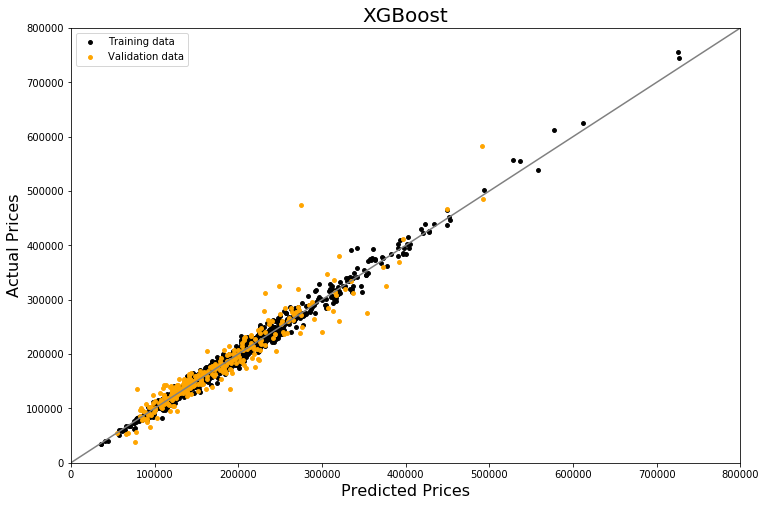

In [33]:
y_train_xgboost = random_xgb1.predict(X_train)
y_test_xgboost = random_xgb1.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_xgboost), np.expm1(y_train), c='black', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_xgboost), np.expm1(y_test), c='orange', marker='o', s=15, label = "Validation data")
plt.title("XGBoost", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

In [36]:

# Get numerical feature importances
importances_xgb = list(xgb.feature_importances_)

# List of tuples with variable and importance
feature_importances_xgb = [(feature, round(importance, 5)) for feature, importance in zip(X_train.columns, importances_xgb)]

# Sort the feature importances by most important first
xgb_feature_importances = sorted(feature_importances_xgb, key = lambda x: x[1], reverse = True )

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in xgb_feature_importances]

Variable: ExterQual__TA        Importance: 0.12094999849796295
Variable: KitchenQual__TA      Importance: 0.07666999846696854
Variable: GarageCars           Importance: 0.0723700001835823
Variable: GarageType__Attchd   Importance: 0.06385999917984009
Variable: YearBuilt            Importance: 0.05065000057220459
Variable: Fireplaces           Importance: 0.04805999994277954
Variable: BsmtQual__Ex         Importance: 0.04413999989628792
Variable: GrLivArea            Importance: 0.041200000792741776
Variable: CentralAir__N        Importance: 0.03891000151634216
Variable: TotalBsmtSF          Importance: 0.037769999355077744
Variable: GarageArea           Importance: 0.035429999232292175
Variable: GarageCond__TA       Importance: 0.025909999385476112
Variable: KitchenQual__Ex      Importance: 0.01730000041425228
Variable: MSZoning__RM         Importance: 0.016130000352859497
Variable: YearRemodAdd         Importance: 0.014890000224113464
Variable: MSZoning__RL         Importance: 0.01413

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [39]:
xgb_feature_importances_top20 = xgb_feature_importances[:20]
featureNames, featureScores = zip(*list(xgb_feature_importances_top20))

Text(0.5, 1.0, 'Feature Importances')

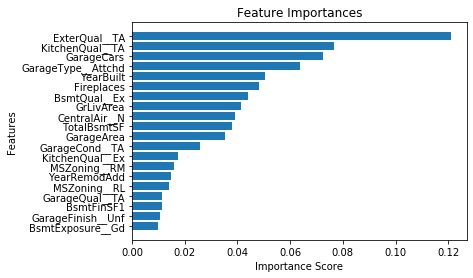

In [40]:
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.gca().invert_yaxis()
plt.title('feature importance')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importances')

### Yan data

In [41]:
X_train = pd.read_csv('./Machine-Learning-Project-master/Yan_ML_Data/X_train.csv')
y_train = pd.read_csv('./Machine-Learning-Project-master/Yan_ML_Data/y_train.csv', index_col=0, names=['SalePrice'])
X_test = pd.read_csv('./Machine-Learning-Project-master/Yan_ML_Data/X_test.csv')
y_test = pd.read_csv('./Machine-Learning-Project-master/Yan_ML_Data/y_test.csv', index_col=0, names=['SalePrice'])



In [42]:
xgb.fit(X_train, y_train)


[11:06:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [43]:
print("The train set R^2 is: %.5f" % xgb.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % xgb.score(X_test, y_test))


The train set R^2 is: 0.95397


ValueError: feature_names mismatch: ['Unnamed: 0', 'FullBath_0', 'FullBath_1', 'FullBath_3', 'FullBath_4', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'Heating_Floor', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_None', 'GarageFinish_Fin', 'GarageFinish_None', 'GarageFinish_RFn', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LandSlope_Mod', 'LandSlope_Sev', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'TotRmsAbvGrd_10', 'TotRmsAbvGrd_11', 'TotRmsAbvGrd_12', 'TotRmsAbvGrd_13', 'TotRmsAbvGrd_14', 'TotRmsAbvGrd_15', 'TotRmsAbvGrd_2', 'TotRmsAbvGrd_3', 'TotRmsAbvGrd_4', 'TotRmsAbvGrd_5', 'TotRmsAbvGrd_7', 'TotRmsAbvGrd_8', 'TotRmsAbvGrd_9', 'GarageCars_0.0', 'GarageCars_1.0', 'GarageCars_3.0', 'GarageCars_4.0', 'GarageCars_5.0', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_None', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'BsmtFullBath_1.0', 'BsmtFullBath_2.0', 'BsmtFullBath_3.0', 'KitchenQual_Ex', 'KitchenQual_Gd', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Partial', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_Stone', 'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'BedroomAbvGr_0', 'BedroomAbvGr_1', 'BedroomAbvGr_2', 'BedroomAbvGr_4', 'BedroomAbvGr_5', 'BedroomAbvGr_6', 'BedroomAbvGr_8', 'GarageQual_Ex', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_None', 'GarageQual_Po', 'CentralAir_N', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'RoofStyle_Flat', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'KitchenAbvGr_0', 'KitchenAbvGr_2', 'KitchenAbvGr_3', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA', 'BsmtFinType2_ALQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_None', 'BsmtFinType2_Rec', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'PavedDrive_N', 'PavedDrive_P', 'GarageCond_Ex', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_None', 'GarageCond_Po', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Fireplaces_1', 'Fireplaces_2', 'Fireplaces_3', 'Fireplaces_4', 'GarageType_2Types', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_None', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'Alley_Grvl', 'Alley_Pave', 'BsmtHalfBath_1.0', 'BsmtHalfBath_2.0', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_None', 'BsmtFinType1_Rec', 'ExterCond_Ex', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'HalfBath_1', 'HalfBath_2', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_None', 'BsmtCond_Po', 'LotFrontage', '2ndFlrSF', 'TotalBsmtSF', 'YearRemodAdd', 'MoSold', 'EnclosedPorch', 'OverallCond', 'OpenPorchSF', 'ScreenPorch', '3SsnPorch', 'GrLivArea', 'OverallQual', 'MiscVal', 'LowQualFinSF', 'PoolArea', 'BsmtUnfSF', 'MasVnrArea', 'MSSubClass', '1stFlrSF', 'LotArea', 'YearBuilt', 'YrSold', 'BsmtFinSF2', 'GarageYrBlt', 'WoodDeckSF', 'BsmtFinSF1', 'GarageArea'] ['Unnamed: 0', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'GarageQual_Ex', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_None', 'GarageQual_Po', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'BsmtFullBath_1.0', 'BsmtFullBath_2.0', 'BsmtFullBath_3.0', 'GarageFinish_Fin', 'GarageFinish_None', 'GarageFinish_RFn', 'GarageCond_Ex', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_None', 'GarageCond_Po', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'FullBath_0', 'FullBath_1', 'FullBath_3', 'FullBath_4', 'GarageCars_0.0', 'GarageCars_1.0', 'GarageCars_3.0', 'GarageCars_4.0', 'GarageCars_5.0', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'HalfBath_1', 'HalfBath_2', 'KitchenQual_Ex', 'KitchenQual_Gd', 'BedroomAbvGr_0', 'BedroomAbvGr_1', 'BedroomAbvGr_2', 'BedroomAbvGr_4', 'BedroomAbvGr_5', 'BedroomAbvGr_6', 'BedroomAbvGr_8', 'TotRmsAbvGrd_10', 'TotRmsAbvGrd_11', 'TotRmsAbvGrd_12', 'TotRmsAbvGrd_13', 'TotRmsAbvGrd_14', 'TotRmsAbvGrd_15', 'TotRmsAbvGrd_2', 'TotRmsAbvGrd_3', 'TotRmsAbvGrd_4', 'TotRmsAbvGrd_5', 'TotRmsAbvGrd_7', 'TotRmsAbvGrd_8', 'TotRmsAbvGrd_9', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'BsmtFinType2_ALQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_None', 'BsmtFinType2_Rec', 'CentralAir_N', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_Stone', 'Heating_Floor', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'ExterCond_Ex', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'Alley_Grvl', 'Alley_Pave', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Partial', 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_None', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_None', 'BsmtCond_Po', 'GarageType_2Types', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_None', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'KitchenAbvGr_0', 'KitchenAbvGr_2', 'KitchenAbvGr_3', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_None', 'BsmtFinType1_Rec', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'BsmtHalfBath_1.0', 'BsmtHalfBath_2.0', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'RoofStyle_Flat', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_None', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'LandSlope_Mod', 'LandSlope_Sev', 'Fireplaces_1', 'Fireplaces_2', 'Fireplaces_3', 'Fireplaces_4', 'PavedDrive_N', 'PavedDrive_P', 'GarageYrBlt', 'MiscVal', 'BsmtFinSF1', 'GarageArea', 'YearRemodAdd', 'YearBuilt', 'OverallQual', 'EnclosedPorch', 'MSSubClass', 'WoodDeckSF', '2ndFlrSF', 'YrSold', 'OverallCond', 'BsmtUnfSF', '3SsnPorch', 'LotArea', 'MasVnrArea', '1stFlrSF', 'TotalBsmtSF', 'OpenPorchSF', 'GrLivArea', 'LowQualFinSF', 'ScreenPorch', 'PoolArea', 'BsmtFinSF2', 'MoSold', 'LotFrontage']

In [49]:
X_train.shape

(1164, 288)

In [50]:
y_train.shape

(1164, 1)

In [51]:
y_test.shape

(292, 1)

In [53]:
y_test.shape

(292, 1)